In [2]:
# show plots in notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# http://systems-sciences.uni-graz.at/etextbook/sw2/lyapunov.html

(400,) (8000,)


In [89]:
def f(x, r):
    return x + r - x**2

def f_derivate(x):
    return 1 - 2*x

In [100]:
result = []
lambdas = []
maps = []

# define range of r 
rvalues = np.arange(0, 2, 0.01)
xticks = np.linspace(0, 2, 4000)

# loop through r
for r in rvalues:
    x = 0.1
    result = []
    # iterate system 100 times
    for t in range(10):
        x = f(x, r)
        # calculate log of the absolute of the derivative
        try:
            log_x = np.log(abs(f_derivate(x)))
            result.append(log_x)
        except Exception as ex:
            pass
    # take average
    lambdas.append(np.mean(result))
    # for the map ignore first 100 iterations as transient time and iterate anew
    for t in range(20):
        x = f(x, r)
        maps.append(x)

print( rvalues.shape, len(maps), len(lambdas), xticks.shape )

(200,) 4000 200 (4000,)


C:\Users\rrick\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


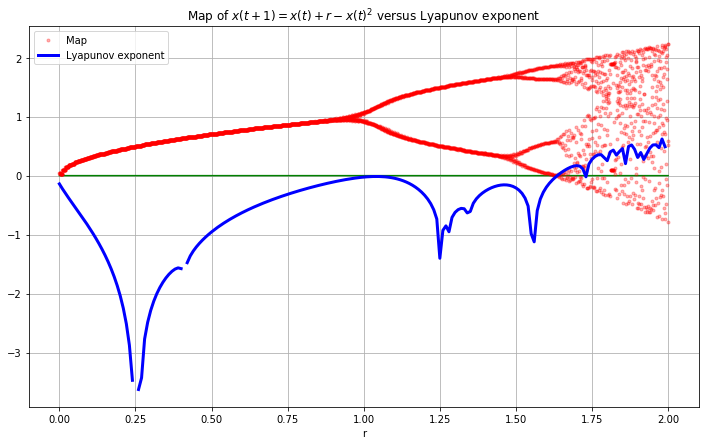

In [107]:
fig = plt.figure(figsize=(12,7))
ax2 = fig.add_subplot(1,1,1)

# zero line
zero = [0] * xticks.shape[0]
ax2.plot(xticks, zero, 'g-')
# plot map
ax2.plot(xticks, maps, 'r.',alpha = 0.3, label = 'Map')
ax2.set_xlabel('r')
# plot lyapunov
ax2.plot(rvalues, lambdas, 'b-', linewidth = 3, label = 'Lyapunov exponent')
ax2.grid('on')
ax2.set_xlabel('r')
ax2.legend(loc='best')
ax2.set_title('Map of $x(t+1) = x(t) + r - x(t)^2$ versus Lyapunov exponent')
plt.show()

In [82]:
result = []
lambdas = []
maps = []
xmin = 2
xmax = 4
mult = (xmax - xmin)*2000

rvalues = np.arange(xmin, xmax, 0.01)
xticks = np.linspace(xmin, xmax, mult)

In [83]:
for r in rvalues:
    x = 0.1
    result = []
    for t in range(100):
        x = r * x * (1 - x)
        result.append(np.log(abs(r - 2*r*x)))
    lambdas.append(np.mean(result))
    # ignore first 100 iterations as transient time
    # then iterate anew
    for t in range(20):
        x = r * x * (1 - x)
        maps.append(x)

C:\Users\rrick\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


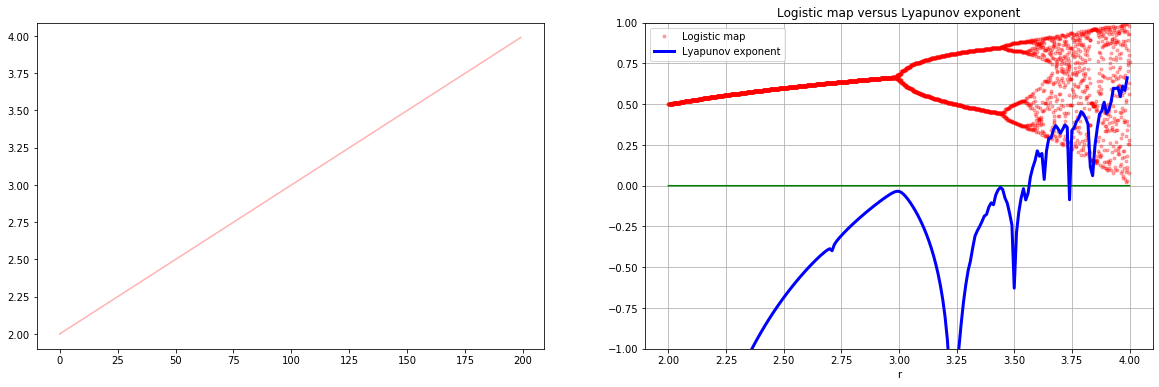

In [85]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(rvalues, 'r',alpha = 0.3)

# zero line
zero = [0]*mult
ax2.plot(xticks, zero, 'g-')
ax2.plot(xticks, maps, 'r.',alpha = 0.3, label = 'Logistic map')
ax2.set_xlabel('r')
ax2.plot(rvalues, lambdas, 'b-', linewidth = 3, label = 'Lyapunov exponent')
ax2.grid('on')
ax2.set_ylim(-1, 1)
ax2.set_xlabel('r')
ax2.legend(loc='best')
ax2.set_title('Logistic map versus Lyapunov exponent')
plt.show()

In [23]:
serie_I = np.cumsum(np.random.normal(0,1,400))
serie_J = np.cumsum(np.random.normal(0,1,400))

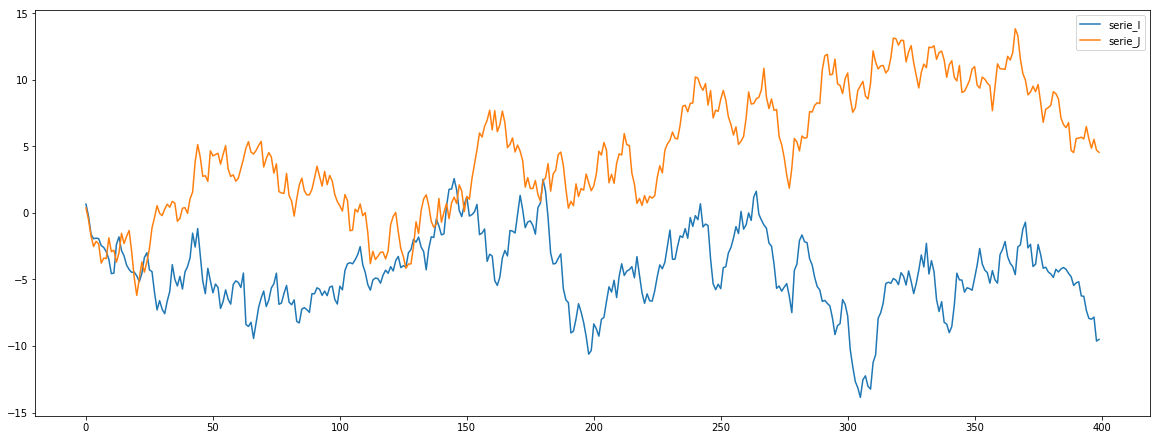

In [24]:
fig = plt.figure(constrained_layout=True, figsize=(16,6))
ax1 = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(1,1,1)
ax1.plot(serie_I, label='serie_I')
ax2.plot(serie_J, label='serie_J')
plt.legend()
plt.show()

In [32]:
from scipy.spatial import distance
dist = distance.cdist(serie_I, serie_J, 'euclidean')
dist

ValueError: XA must be a 2-dimensional array.

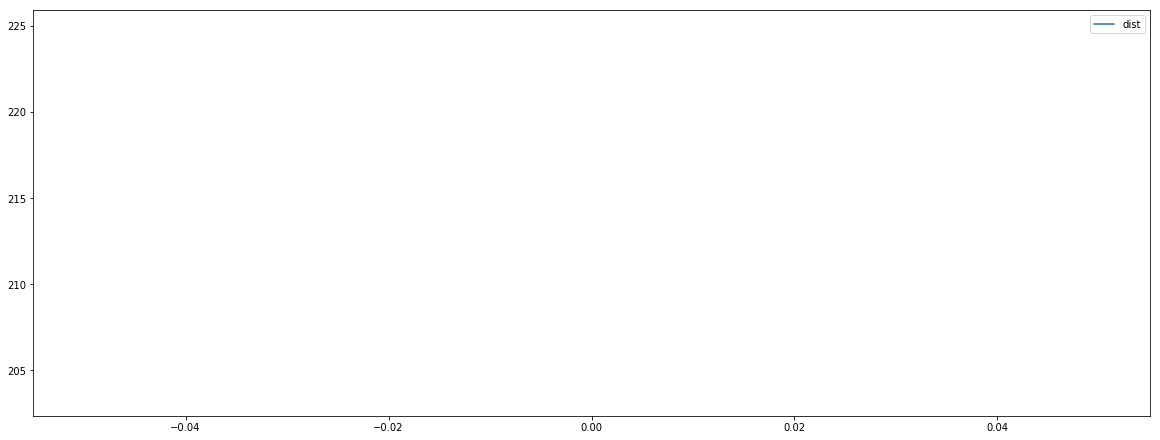

In [27]:
fig = plt.figure(constrained_layout=True, figsize=(16,6))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(dist, label='dist')
plt.legend()
plt.show()

In [39]:
np.arange(serie_I).reshape((3, 2))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [42]:
np.concatenate([serie_I,serie_I], axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1